In [20]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Load training mit training dataset

In [4]:
df_train = pd.read_csv("data/mitbih_train.csv", header=None)
df_train = df_train.sample(frac=1)
df_test = pd.read_csv("data/mitbih_test.csv", header=None)

Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]

Y_test = np.array(df_test[187].values).astype(np.int8)
X_test = np.array(df_test[list(range(187))].values)[..., np.newaxis]

### ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
Dataset seems to be quite unbalanced

In [11]:
unique, counts = np.unique(Y, return_counts=True)
list(zip(unique.tolist(), counts.tolist()))

[(0, 72471), (1, 2223), (2, 5788), (3, 641), (4, 6431)]

### Plot one of each label

In [16]:
label_index = {i: np.where(Y == i)[0].tolist() for i in range(0, 5)}

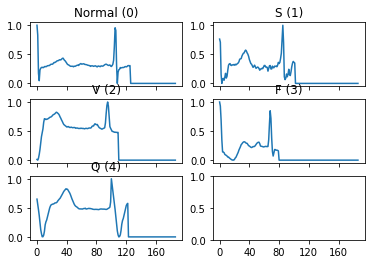

In [18]:
fig,a =  plt.subplots(3,2, sharex='col')
plt.setp(a, xticks=[i*20 for i in range(0, 11, 2)], xticklabels=[i*20 for i in range(0, 11, 2)])

a[0][0].plot(X[label_index[0][0], :])
a[0][0].set_title('Normal (0)')
a[0][1].plot(X[label_index[1][0], :])
a[0][1].set_title('S (1)')
a[1][0].plot(X[label_index[2][0], :])
a[1][0].set_title('V (2)')
a[1][1].plot(X[label_index[3][0], :])
a[1][1].set_title('F (3)')
a[2][0].plot(X[label_index[4][0], :])
a[2][0].set_title('Q (4)')
plt.show()

### Load training ptbdb training dataset

In [23]:
df_1 = pd.read_csv("data/ptbdb_normal.csv", header=None)
df_2 = pd.read_csv("data/ptbdb_abnormal.csv", header=None)
df = pd.concat([df_1, df_2])

df_train_pt, df_test_pt = train_test_split(df, test_size=0.2, random_state=1337, stratify=df[187])


Y_pt = np.array(df_train_pt[187].values).astype(np.int8)
X_pt = np.array(df_train_pt[list(range(187))].values)[..., np.newaxis]

Y_test_pt = np.array(df_test_pt[187].values).astype(np.int8)
X_test_pt = np.array(df_test_pt[list(range(187))].values)[..., np.newaxis]

### Normal vs Abnormal count

In [24]:
df_1.shape[0], df_2.shape[0]

(4046, 10506)

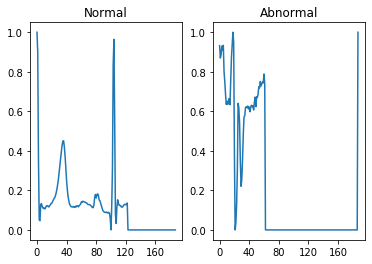

In [25]:
fig,a = plt.subplots(1,2, sharex='col')
plt.setp(a, xticks=[i*20 for i in range(0, 11, 2)], xticklabels=[i*20 for i in range(0, 11, 2)])

a[0].plot(df_1.iloc[0, :])
a[0].set_title('Normal')
a[1].plot(df_2.iloc[0, :])
a[1].set_title('Abnormal')
plt.show()